<div class="usecase-title">Exploring Business Establishments in the City of Melbourne by ANZSIC4 Classification and CLUE Small Area</div>

<div class="usecase-authors"><b>Authored by: </b> Naga Nikhil Woopalanchi</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

write a description of the problem you are trying to solve for this use case{Using User Story format, .}

<div class="usecase-section-header">What this use case will teach you</div>

write a description of the problem you are trying to solve for this use case{Using User Story format, .}

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



# Importing Libraries

Importing the required python modules 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import holoviews as hv
import folium

In [ ]:
# Business establishments and jobs-data by business size and industry

base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='business-establishments-and-jobs-data-by-business-size-and-industry'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC' }

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    # Renaming the dataset as bizsize_industry jobs 
    bizsize_industryjobs=pd.read_csv(StringIO(url_content),delimiter=';')   
    print(bizsize_industryjobs.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

   census_year               clue_small_area  \
0         2015  West Melbourne (Residential)   
1         2015  West Melbourne (Residential)   
2         2015  West Melbourne (Residential)   
3         2015  West Melbourne (Residential)   
4         2015  West Melbourne (Residential)   
5         2015  West Melbourne (Residential)   
6         2014                       Carlton   
7         2014                       Carlton   
8         2014                       Carlton   
9         2014                       Carlton   

                                   anzsic_indusrty  \
0                Health Care and Social Assistance   
1                                    Manufacturing   
2                                    Manufacturing   
3  Professional, Scientific and Technical Services   
4          Rental, Hiring and Real Estate Services   
5                                  Wholesale Trade   
6              Administrative and Support Services   
7                                     C

In [ ]:
# Business establishments with address and industry classification

base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='business-establishments-with-address-and-industry-classification'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    # Renaming the dataset as bizaddressindustry
    bizaddressindustry=pd.read_csv(StringIO(url_content),delimiter=';')    
    print(bizaddressindustry.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

   census_year  block_id  property_id  base_property_id  clue_small_area  \
0         2003       105       100172            100172  Melbourne (CBD)   
1         2003       105       103301            103301  Melbourne (CBD)   
2         2003       105       103302            103302  Melbourne (CBD)   
3         2003       105       103302            103302  Melbourne (CBD)   
4         2003       105       103302            103302  Melbourne (CBD)   
5         2003       105       103302            103302  Melbourne (CBD)   
6         2003       105       103302            103302  Melbourne (CBD)   
7         2003       105       103302            103302  Melbourne (CBD)   
8         2003       105       103302            103302  Melbourne (CBD)   
9         2003       105       109319            109319  Melbourne (CBD)   

                                        trading_name  \
0                           Wilson Parking Australia   
1                Melbourne International Backpacker

In [ ]:
# Street-address

base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='street-addresses'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    street_add=pd.read_csv(StringIO(url_content),delimiter=';')  #renaming dataset
    print(street_add.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

                         geo_point_2d  \
0  -37.802381557572, 144.941473440919   
1  -37.816860132435, 144.969991449806   
2  -37.798830275265, 144.942872100233   
3  -37.810546771396, 144.970906397029   
4  -37.789293657657, 144.939794028368   
5  -37.800782747366, 144.951363910142   
6  -37.826775193662, 144.959358160779   
7  -37.810925617843, 144.965443591832   
8   -37.81275302482, 144.964263891172   
9   -37.821209833971, 144.95403377339   

                                           geo_shape  suburb_id   latitude  \
0  {"coordinates": [144.941473440919, -37.8023815...      592.0 -37.802382   
1  {"coordinates": [144.969991449806, -37.8168601...      591.0 -37.816860   
2  {"coordinates": [144.942872100233, -37.7988302...      592.0 -37.798830   
3  {"coordinates": [144.970906397029, -37.8105467...      591.0 -37.810547   
4  {"coordinates": [144.939794028368, -37.7892936...      592.0 -37.789294   
5  {"coordinates": [144.951363910142, -37.8007827...      592.0 -37.800783   
6 

# Preprocessing  street_add

## Street_add

In [ ]:
street_add

,geo_point_2d,geo_shape,suburb_id,latitude,street_no,str_name,address_pnt,easting,northing,gisid,longitude,suburb,street_id,add_comp
0,"-37.802381557572, 144.941473440919","{""coordinates"": [144.941473440919, -37.8023815...",592.0,-37.802382,133,Laurens Street,133 Laurens Street North Melbourne,318773.161972,5.814115e+06,48531,144.941473,North Melbourne,781,NaN
1,"-37.816860132435, 144.969991449806","{""coordinates"": [144.969991449806, -37.8168601...",591.0,-37.816860,129,Flinders Street,129 Flinders Street Melbourne,321318.983104,5.812563e+06,37711,144.969991,Melbourne,636,NaN
2,"-37.798830275265, 144.942872100233","{""coordinates"": [144.942872100233, -37.7988302...",592.0,-37.798830,44,Macaulay Road,44 Macaulay Road North Melbourne,318887.633593,5.814512e+06,30476,144.942872,North Melbourne,847,NaN
3,"-37.810546771396, 144.970906397029","{""coordinates"": [144.970906397029, -37.8105467...",591.0,-37.810547,13,Punch Lane,13 Punch Lane Melbourne,321384.307636,5.813265e+06,35165,144.970906,Melbourne,1003,NaN
4,"-37.789293657657, 144.939794028368","{""coordinates"": [144.939794028368, -37.7892936...",592.0,-37.789294,61,Racecourse Road,61 Racecourse Road North Melbourne,318593.277492,5.815564e+06,22247,144.939794,North Melbourne,119624,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63716,"-37.799002138708, 144.974875728308","{""coordinates"": [144.974875728308, -37.7990021...",0.0,-37.799002,190,Nicholson Street,190 Nicholson Street,321705.987201,5.814554e+06,23688,144.974876,NaN,931,NaN
63717,"-37.812386139394, 144.97001218945","{""coordinates"": [144.97001218945, -37.81238613...",591.0,-37.812386,109,Bourke Street,109 Bourke Street Melbourne,321310.019913,5.813060e+06,16739,144.970012,Melbourne,455,NaN
63718,"-37.790814400126, 144.928709232409","{""coordinates"": [144.928709232409, -37.7908144...",590.0,-37.790814,23,McConnell Street,23 McConnell Street Kensington,317620.864400,5.815374e+06,27952,144.928709,Kensington,119634,NaN
63719,"-37.793946584931, 144.92906362331","{""coordinates"": [144.92906362331, -37.79394658...",590.0,-37.793947,516A,Macaulay Road,516A Macaulay Road Kensington,317659.774071,5.815027e+06,40114,144.929064,Kensington,847,NaN


In [ ]:
street_add.shape

(63721, 14)

In [ ]:
street_add.columns

Index(['geo_point_2d', 'geo_shape', 'suburb_id', 'latitude', 'street_no',
       'str_name', 'address_pnt', 'easting', 'northing', 'gisid', 'longitude',
       'suburb', 'street_id', 'add_comp'],
      dtype='object')

In [ ]:
street_add = street_add.drop(['geo_point_2d','geo_shape','easting','northing','gisid'],axis=1)

In [ ]:
street_add

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id,add_comp
0,592.0,-37.802382,133,Laurens Street,133 Laurens Street North Melbourne,144.941473,North Melbourne,781,NaN
1,591.0,-37.816860,129,Flinders Street,129 Flinders Street Melbourne,144.969991,Melbourne,636,NaN
2,592.0,-37.798830,44,Macaulay Road,44 Macaulay Road North Melbourne,144.942872,North Melbourne,847,NaN
3,591.0,-37.810547,13,Punch Lane,13 Punch Lane Melbourne,144.970906,Melbourne,1003,NaN
4,592.0,-37.789294,61,Racecourse Road,61 Racecourse Road North Melbourne,144.939794,North Melbourne,119624,NaN
...,...,...,...,...,...,...,...,...,...
63716,0.0,-37.799002,190,Nicholson Street,190 Nicholson Street,144.974876,NaN,931,NaN
63717,591.0,-37.812386,109,Bourke Street,109 Bourke Street Melbourne,144.970012,Melbourne,455,NaN
63718,590.0,-37.790814,23,McConnell Street,23 McConnell Street Kensington,144.928709,Kensington,119634,NaN
63719,590.0,-37.793947,516A,Macaulay Road,516A Macaulay Road Kensington,144.929064,Kensington,847,NaN


## handling missing values

In [ ]:
street_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63721 entries, 0 to 63720
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suburb_id    63715 non-null  float64
 1   latitude     63721 non-null  float64
 2   street_no    63069 non-null  object 
 3   str_name     63720 non-null  object 
 4   address_pnt  63721 non-null  object 
 5   longitude    63721 non-null  float64
 6   suburb       62991 non-null  object 
 7   street_id    63721 non-null  int64  
 8   add_comp     1352 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.4+ MB


In [ ]:
street_add.isna().sum()

suburb_id          6
latitude           0
street_no        652
str_name           1
address_pnt        0
longitude          0
suburb           730
street_id          0
add_comp       62369
dtype: int64

### Handing missing values for 'add_comp' column

With more than half of the values missing for this column dropping this column


In [ ]:
street_add = street_add.drop('add_comp',axis = 1)

observing the row with missing values or the suburb_id is zero

In [ ]:
suburb_id_nan = street_add[street_add['suburb_id'].isna()]

suburb_id_nan

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id
15724,NaN,-37.825995,50,Normanby Road,50 Normanby Road,144.955261,NaN,1368
26136,NaN,-37.827486,126,Normanby Road,126 Normanby Road,144.952721,NaN,1368
29528,NaN,-37.827525,130,Normanby Road,130 Normanby Road,144.952561,NaN,1368
34191,NaN,-37.827506,128,Normanby Road,128 Normanby Road,144.952641,NaN,1368
55077,NaN,-37.827467,124,Normanby Road,124 Normanby Road,144.952801,NaN,1368
57013,NaN,-37.826040,52,Normanby Road,52 Normanby Road,144.955198,NaN,1368


In [ ]:
suburb_id_zero= street_add[street_add['suburb'].isna()]

suburb_id_zero

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id
20,0.0,-37.788135,772,Lygon Street,772 Lygon Street,144.969279,NaN,840
61,0.0,-37.827770,165,Normanby Road,165 Normanby Road,144.951017,NaN,1368
85,0.0,-37.786158,42,Leonard Crescent,42 Leonard Crescent,144.906459,NaN,1313
118,0.0,-37.804792,68,Nicholson Street,68 Nicholson Street,144.973896,NaN,931
559,0.0,-37.775535,951,Park Street,951 Park Street,144.940570,NaN,962
...,...,...,...,...,...,...,...,...
63124,0.0,-37.781990,34,Langs Road,34 Langs Road,144.908970,NaN,1312
63127,0.0,-37.780382,62,Bowen Crescent,62 Bowen Crescent,144.962916,NaN,457
63235,0.0,-37.784645,10,Garton Street,10 Garton Street,144.963762,NaN,648
63390,0.0,-37.785339,465,Lygon Street,465 Lygon Street,144.969403,NaN,840


replacing missing suburb_id values with 0

In [ ]:
street_add['suburb_id'] = street_add['suburb_id'].fillna(0)

In [ ]:
street_add['suburb'] = street_add['suburb'].fillna('unknown suburb')

In [ ]:
street_add.isna().sum()

suburb_id        0
latitude         0
street_no      652
str_name         1
address_pnt      0
longitude        0
suburb           0
street_id        0
dtype: int64

Replacing the missing street_no with 0

In [ ]:
street_add['street_no']= street_add['street_no'].fillna(0)

In [ ]:
street_name = street_add[street_add['str_name'].isna()]

street_name

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id
58476,592.0,-37.796995,5,NaN,5 North Melbourne,144.95,North Melbourne,2931


In [ ]:
street_add['str_name'] = street_add['str_name'].fillna('unknow street_name')

In [ ]:
street_add.isna().sum()

suburb_id      0
latitude       0
street_no      0
str_name       0
address_pnt    0
longitude      0
suburb         0
street_id      0
dtype: int64

In [ ]:
street_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63721 entries, 0 to 63720
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suburb_id    63721 non-null  float64
 1   latitude     63721 non-null  float64
 2   street_no    63721 non-null  object 
 3   str_name     63721 non-null  object 
 4   address_pnt  63721 non-null  object 
 5   longitude    63721 non-null  float64
 6   suburb       63721 non-null  object 
 7   street_id    63721 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 3.9+ MB


correcting the datatype from the dataset, subrurb_id should be int datatype not object.

In [ ]:
street_add['suburb_id'] = street_add['suburb_id'].apply(np.int64)

In [ ]:
street_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63721 entries, 0 to 63720
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suburb_id    63721 non-null  int64  
 1   latitude     63721 non-null  float64
 2   street_no    63721 non-null  object 
 3   str_name     63721 non-null  object 
 4   address_pnt  63721 non-null  object 
 5   longitude    63721 non-null  float64
 6   suburb       63721 non-null  object 
 7   street_id    63721 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ MB


In [ ]:
suburb_id_keys = street_add[['suburb_id','suburb']]

suburb_id_keys = suburb_id_keys.drop_duplicates()

print(suburb_id_keys)

     suburb_id           suburb
0          592  North Melbourne
1          591        Melbourne
6          596        Southbank
9          599        Docklands
10         597   West Melbourne
11         593        Parkville
12         585          Carlton
16         587   East Melbourne
19         590       Kensington
20           0   unknown suburb
23         594   Port Melbourne
52         588       Flemington
81         595      South Yarra
121        586    Carlton North
464        840      South Wharf


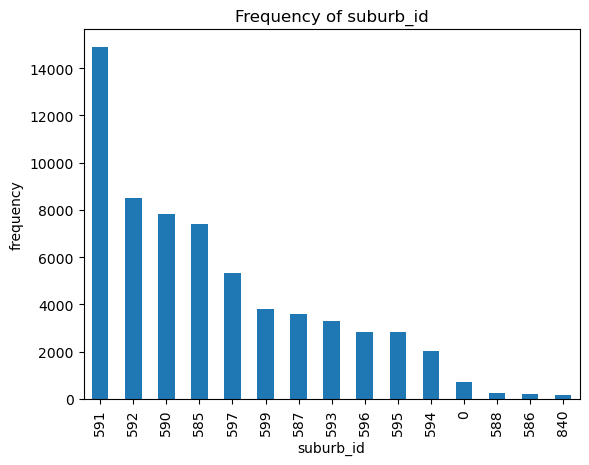

In [ ]:
suburb_counts = street_add['suburb_id'].value_counts()

suburb_counts.plot(kind = 'bar')
plt.xlabel('suburb_id')
plt.ylabel('frequency')
plt.title('Frequency of suburb_id')
plt.show()

suburb_counts = street_add['suburb_id'].value_counts()
m
suburb_counts.plot(kind = 'bar')
plt.xlabel('suburb_id')
plt.ylabel('frequency')
plt.title('Frequency of suburb_id')
plt.show()

Let's try to handle the missing values in add_comp with the highest number of missing values

## bizsize_industryjobs

In [ ]:
bizsize_industryjobs.head()

,census_year,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,2015,West Melbourne (Residential),Health Care and Social Assistance,Health Care and Social Assistance,Large business,1,NaN
1,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Medium business,5,171.0
2,2015,West Melbourne (Residential),Manufacturing,Manufacturing,Non employing,1,NaN
3,2015,West Melbourne (Residential),"Professional, Scientific and Technical Services",Business Services,Non employing,3,0.0
4,2015,West Melbourne (Residential),"Rental, Hiring and Real Estate Services",Real Estate Services,Small business,5,42.0


In [ ]:
bizsize_industryjobs = bizsize_industryjobs.sort_values(by = 'census_year',ascending = True)

In [ ]:
bizsize_industryjobs.columns

Index(['census_year', 'clue_small_area', 'anzsic_indusrty', 'clue_industry',
       'business_size', 'total_establishments', 'total_jobs'],
      dtype='object')

In [ ]:
bizsize_industryjobs['census_year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [ ]:
bizsize_cluesmallarea = bizsize_industryjobs['clue_small_area'].unique()

bizsize_cluesmallarea

array(['Melbourne (CBD)', 'City of Melbourne (total)',
       'West Melbourne (Residential)', 'Docklands', 'Carlton',
       'Port Melbourne', 'South Yarra', 'North Melbourne', 'Parkville',
       'Southbank', 'West Melbourne (Industrial)', 'East Melbourne',
       'Kensington', 'Melbourne (Remainder)'], dtype=object)

In [ ]:
bizsize_anzsic =bizsize_industryjobs['anzsic_indusrty'].unique()
bizsize_anzsic

array(['Public Administration and Safety', 'Construction',
       'Education and Training',
       'Electricity, Gas, Water and Waste Services',
       'Financial and Insurance Services',
       'Health Care and Social Assistance', 'Manufacturing', 'Mining',
       'Other Services',
       'Professional, Scientific and Technical Services',
       'Rental, Hiring and Real Estate Services',
       'Arts and Recreation Services',
       'Administrative and Support Services', 'Retail Trade',
       'Transport, Postal and Warehousing', 'Wholesale Trade',
       'Accommodation and Food Services',
       'Agriculture, Forestry and Fishing',
       'Information Media and Telecommunications', 'All ANZSIC'],
      dtype=object)

In [ ]:
bizsize_clueindustry = bizsize_industryjobs['clue_industry'].unique()
bizsize_clueindustry

array(['Public Administration and Safety', 'Construction',
       'Education and Training',
       'Electricity, Gas, Water and Waste Services',
       'Finance and Insurance', 'Health Care and Social Assistance',
       'Manufacturing', 'Agriculture and Mining', 'Other Services',
       'Business Services', 'Real Estate Services',
       'Arts and Recreation Services', 'Admin and Support Services',
       'Rental and Hiring Services', 'Retail Trade',
       'Transport, Postal and Storage', 'Wholesale Trade',
       'Accommodation', 'Food and Beverage Services',
       'Information Media and Telecommunications', 'All CLUE Industry'],
      dtype=object)

In [ ]:
bizsize_industryjobs['business_size'].unique()

array(['Non employing', 'Medium business', 'Small business',
       'Large business'], dtype=object)

In [ ]:
bizsize_industryjobs['total_establishments'].unique()

array([    1,    32,    78,    12,    15,     5,    48,    17,     7,
           6,   933,  1581,    42,     3,    90,   106,   114,   144,
         148,   111,     2,     9,     4,    43,    18,    49,   109,
        1214,   158,    10,    67,    53,    22,    21,  9586,    11,
         149,    36,    33,    30,   122,   129,     8,    13,    19,
          96,    35,    38,   176,    39,    88,    60,    29,    87,
          23,    27,    20,    56,    37,    69,   147,   428,    31,
          14,    25,    44,    57,   501,   228,  1072,   275,    65,
         105,    24,    85,    70,    72,    16,   143,   312,    98,
         802,    50,   115,   593,  1685,    62,    40,   341,    58,
         554,   190,    93,    59,   108,    54,   404,   137,    75,
        1237,   154,    51,    89,   181,   134,   553,   688,   233,
         462,    82,   513,   229,  1695,    55,   185,   551,   163,
        1245,   121,    80,   156,   135,   162,    26,   127,    28,
        1707,   187,

In [ ]:
bizsize_industryjobs['total_jobs'].unique()

array([   nan,  1783.,  4726., ...,  3183.,  1044., 11618.])

In [ ]:
bizsize_industryjobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 7345 to 9761
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   census_year           14692 non-null  int64  
 1   clue_small_area       14692 non-null  object 
 2   anzsic_indusrty       14692 non-null  object 
 3   clue_industry         14692 non-null  object 
 4   business_size         14692 non-null  object 
 5   total_establishments  14692 non-null  int64  
 6   total_jobs            10365 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 918.2+ KB


In [ ]:
bizsize_industryjobs.isna().sum()

census_year                0
clue_small_area            0
anzsic_indusrty            0
clue_industry              0
business_size              0
total_establishments       0
total_jobs              4327
dtype: int64

Handling missing vaues

In [ ]:
business_size_descriptive = bizsize_industryjobs.groupby('business_size')['total_jobs'].describe()

business_size_descriptive

,count,mean,std,min,25%,50%,75%,max
business_size,,,,,,,,
Large business,1076.0,12633.487918,32292.079142,687.0,2084.5,3882.0,11539.25,273200.0
Medium business,3095.0,2418.815509,10420.953933,66.0,222.5,409.0,1267.00,153302.0
Non employing,1720.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
Small business,4474.0,984.121144,5117.223702,3.0,48.0,108.0,393.50,80008.0


In [ ]:
bizsize_industryjobs['total_jobs'] = bizsize_industryjobs.groupby('business_size')['total_jobs'].transform(lambda x: x.fillna(x.min()))

In [ ]:
bizsize_industryjobs['total_jobs'] = bizsize_industryjobs['total_jobs'].apply(np.int64)

In [ ]:
bizsize_industryjobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14692 entries, 7345 to 9761
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   census_year           14692 non-null  int64 
 1   clue_small_area       14692 non-null  object
 2   anzsic_indusrty       14692 non-null  object
 3   clue_industry         14692 non-null  object
 4   business_size         14692 non-null  object
 5   total_establishments  14692 non-null  int64 
 6   total_jobs            14692 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 918.2+ KB


## bizaddressindustry

In [ ]:
bizaddressindustry.head()

,census_year,block_id,property_id,base_property_id,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,longitude,latitude
0,2003,105,100172,100172,Melbourne (CBD),Wilson Parking Australia,24-46 A'Beckett Street MELBOURNE 3000,9533,Parking Services,144.962053,-37.808573
1,2003,105,103301,103301,Melbourne (CBD),Melbourne International Backpackers,442-450 Elizabeth Street MELBOURNE 3000,4400,Accommodation,144.960868,-37.808309
2,2003,105,103302,103302,Melbourne (CBD),Vacant,422-440 Elizabeth Street MELBOURNE 3000,0,Vacant Space,144.961017,-37.808630
3,2003,105,103302,103302,Melbourne (CBD),The Garden Cafe,"Shop 3, Ground , 422-440 Elizabeth Street MELB...",4511,Cafes and Restaurants,144.961017,-37.808630
4,2003,105,103302,103302,Melbourne (CBD),Telephony Australia,"Shop 5, Ground , 422-440 Elizabeth Street MELB...",5809,Other Telecommunications Services,144.961017,-37.808630


In [ ]:
bizaddressindustry=bizaddressindustry.sort_values(by='census_year',ascending = True)

In [ ]:
bizaddressindustry.columns

Index(['census_year', 'block_id', 'property_id', 'base_property_id',
       'clue_small_area', 'trading_name', 'business_address',
       'industry_anzsic4_code', 'industry_anzsic4_description', 'longitude',
       'latitude'],
      dtype='object')

In [ ]:
bizaddress_censusyear = bizaddressindustry['census_year'].unique()

bizaddress_censusyear

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [ ]:
bizaddressindustry['block_id'].unique()

array([ 748,   78,   77,   74,   76,   82,   81,   73,   72,   85,   93,
         92,   91,   87,   84,   83,   64,   63,   62,   57,   58,   61,
         67,   66,   68,   71,   65,   94,  242,  241,  240,  239,  237,
        226,  227,  228,  229,  230,  232,  234,  236,  246,  245,  243,
        218,  217,  223,  224,  225,  222,  220,  219,  260,  259,  258,
        257,  255,  256,  267,  266,  265,  264,  261,  262,  263,  251,
        248,  247,  252,  254,  105,  104,  103,  101,  113,  107,  111,
         98,   97,   95,   96,  210,  207,  206,  205,  212,  213,  216,
        215,  204,  214,  203,  201,  114,  125,  131,  116,  115,   35,
         38,   37,   36,   32,   33,   31,   28,   34,   53,   52,   51,
         47,   46,   48,   56,   54,   55,   43,   42,   44,   41,   45,
        803,  802,  801,  795,  808,  807,  806,  804,  794,  793,  784,
        783,  782,  781,  779,  791,  790,  792,  785,  786,  787,  789,
        788,  778,  920,  919,  916,  915,  870,  9

In [ ]:
bizaddressindustry['property_id'].unique()

array([108658, 103618, 105752, ..., 714182, 714412, 511130], dtype=int64)

In [ ]:
bizaddressindustry['base_property_id'].unique()

array([108658, 103618, 110709, ..., 102196, 714412, 511130], dtype=int64)

In [ ]:
bizaddress_cluesmallarea = bizaddressindustry['clue_small_area'].unique()

bizaddress_cluesmallarea

array(['Southbank', 'Melbourne (CBD)', 'West Melbourne (Residential)',
       'Carlton', 'Docklands', 'Port Melbourne', 'Parkville',
       'Melbourne (Remainder)', 'West Melbourne (Industrial)',
       'South Yarra', 'East Melbourne', 'North Melbourne', 'Kensington'],
      dtype=object)

In [ ]:
bizaddressindustry['industry_anzsic4_code'].unique()

array([   0, 4511, 9531, 4512, 5801, 7220, 1611, 6999, 4129, 8101, 5101,
       9551, 6720, 4520, 3211, 7000, 6931, 4810, 4271, 9540, 4279, 8102,
       7299, 9511, 9559, 6411, 6932, 6230, 7510, 6924, 4400, 4213, 6419,
       5419, 6921, 1191, 7520, 6330, 4211, 3912, 4242, 4241, 7540, 9533,
       9001, 1510, 7714, 5299, 8219, 6961, 5809, 9002, 8599, 8512, 4252,
       8532, 4255, 4273, 4244, 4258, 4251, 4243, 4257, 4710, 4110, 9552,
       9539, 8922, 6923, 9422, 8531, 2620, 2491, 3231, 6922, 4221, 2640,
       4530, 2599, 9411, 6221, 7711, 4274, 6962, 4253, 4259, 4214, 3494,
       1351, 2700, 1333, 9491, 7211, 3732, 1523, 8511, 8220, 6940, 7552,
       5910, 5922, 5309, 9003, 8790, 5413, 4111, 6950, 3339, 3019, 5411,
       7291, 4123, 4260, 5513, 6991, 5420, 6223, 5610, 8212, 3739, 9114,
       3711, 3299, 6420, 4121, 8520, 4623, 3332, 8539, 2591, 8710, 1912,
       3605, 9419, 7311, 8021, 7600, 8537, 4222, 6632, 6611, 3419, 3921,
       4122, 4272, 4000, 2010, 6925, 9111, 1620, 95

In [ ]:
bizaddressindustry_anzsic4_desc = bizaddressindustry['industry_anzsic4_description'].unique()

bizaddressindustry_anzsic4_desc

array(['Vacant Space', 'Cafes and Restaurants',
       'Laundry and Dry-Cleaning Services', 'Takeaway Food Services',
       'Wired Telecommunications Network Operation',
       'Travel Agency and Tour Arrangement Services', 'Printing',
       'Other Professional, Scientific and Technical Services n.e.c.',
       'Other Specialised Food Retailing',
       'Technical and Vocational Education and Training',
       'Postal Services',
       'Business and Professional Association Services',
       'Real Estate Services', 'Pubs, Taverns and Bars',
       'Land Development and Subdivision',
       'Computer System Design and Related Services', 'Legal Services',
       'Water Freight Transport',
       'Pharmaceutical, Cosmetic and Toiletry Goods Retailing',
       'Religious Services', 'Other Store-Based Retailing n.e.c.',
       'Higher Education', 'Other Administrative Services n.e.c.',
       'Hairdressing and Beauty Services',
       'Other Interest Group Services n.e.c.',
       'Financ

In [ ]:
bizaddressindustry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374210 entries, 198360 to 318285
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   census_year                   374210 non-null  int64  
 1   block_id                      374210 non-null  int64  
 2   property_id                   374210 non-null  int64  
 3   base_property_id              374210 non-null  int64  
 4   clue_small_area               374210 non-null  object 
 5   trading_name                  374083 non-null  object 
 6   business_address              374209 non-null  object 
 7   industry_anzsic4_code         374210 non-null  int64  
 8   industry_anzsic4_description  374210 non-null  object 
 9   longitude                     369425 non-null  float64
 10  latitude                      369425 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 34.3+ MB


In [ ]:
bizaddressindustry.isna().sum()

census_year                        0
block_id                           0
property_id                        0
base_property_id                   0
clue_small_area                    0
trading_name                     127
business_address                   1
industry_anzsic4_code              0
industry_anzsic4_description       0
longitude                       4785
latitude                        4785
dtype: int64

In [ ]:
bizaddressindustry['trading_name'] = bizaddressindustry['trading_name'].fillna('unknown name')

bizaddressindustry['business_address'] = bizaddressindustry['business_address'].fillna('unknown address')

In [ ]:
missing_location =bizaddressindustry[bizaddressindustry['longitude'].isna()]

missing_location

,census_year,block_id,property_id,base_property_id,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,longitude,latitude
198772,2002,794,110495,110495,Port Melbourne,Vacant,PORT MELBOURNE 3207,0,Vacant Space,NaN,NaN
199146,2002,931,107619,107426,Parkville,Royal Park Pro Golf Shop,"Kiosk , 11 Old Poplar Road PARKVILLE 3052",4241,Sport and Camping Equipment Retailing,NaN,NaN
198998,2002,852,111029,111029,Melbourne (Remainder),Kings Domain South,44-200 Domain Road MELBOURNE 3004,8922,Nature Reserves and Conservation Parks Operation,NaN,NaN
198236,2002,730,619639,619639,Southbank,Parking,75-77 Haig Street SOUTHBANK 3006,9533,Parking Services,NaN,NaN
198088,2002,654,580630,580630,Melbourne (Remainder),Regal Parking Pty Ltd,100 Batman Avenue MELBOURNE 3004,9533,Parking Services,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
71821,2018,113,570642,570642,Melbourne (CBD),Open Space,Queen Street MELBOURNE 3000,8922,Nature Reserves and Conservation Parks Operation,NaN,NaN
52033,2018,773,668840,668840,Docklands,unknown name,94-106 South Wharf Drive DOCKLANDS 3008,0,Vacant Space,NaN,NaN
52525,2018,863,108616,108616,Melbourne (Remainder),Melbourne Grammar School,1 St Kilda Road MELBOURNE 3004,8023,Combined Primary and Secondary Education,NaN,NaN
331420,2019,113,570642,570642,Melbourne (CBD),Open Space,Queen Street MELBOURNE 3000,8922,Nature Reserves and Conservation Parks Operation,NaN,NaN


In [ ]:
bizaddressindustry

,census_year,block_id,property_id,base_property_id,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,longitude,latitude
198360,2002,748,108658,108658,Southbank,Vacant,312-318 St Kilda Road SOUTHBANK 3006,0,Vacant Space,144.970696,-37.829092
192852,2002,78,103618,103618,Melbourne (CBD),Barista Cafe,"Shop 11, 242-284 Exhibition Street MELBOURNE 3000",4511,Cafes and Restaurants,144.969985,-37.809416
192850,2002,78,103618,103618,Melbourne (CBD),Gregorys Shoe Repairs & Drycleaning,"Shop 3, 242-284 Exhibition Street MELBOURNE 3000",9531,Laundry and Dry-Cleaning Services,144.969985,-37.809416
192848,2002,78,103618,103618,Melbourne (CBD),Sweet Bites,"Shop 16, 242-284 Exhibition Street MELBOURNE 3000",4512,Takeaway Food Services,144.969985,-37.809416
192846,2002,78,103618,103618,Melbourne (CBD),Telstra,"Level 1, 242-284 Exhibition Street MELBOURNE 3000",5801,Wired Telecommunications Network Operation,144.969985,-37.809416
...,...,...,...,...,...,...,...,...,...,...,...
121120,2022,131,103978,111287,Docklands,Vacant,"Shop 9-10, Ground 18-38 Siddeley Street DOCKLA...",0,Vacant Space,144.953783,-37.822581
121119,2022,131,103978,111287,Docklands,Vacant,"Office 11, LwrConcrse 18-38 Siddeley Street DO...",0,Vacant Space,144.953783,-37.822581
121118,2022,131,103978,111287,Docklands,Little Assets Melb City Early Learning Centre,Part Ground & Part Level 3 Tower 4 18-38 Sidde...,8710,Child Care Services,144.953783,-37.822581
120956,2022,101,108955,108955,West Melbourne (Residential),Supaw Pet Bakery,"Unit 1, Level 1 364 Spencer Street WEST MELBOU...",1174,Bakery Product Manufacturing (Non-factory based),144.951175,-37.811890


In [ ]:
bizsize_industryjobs

,census_year,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
7345,2002,Melbourne (CBD),Public Administration and Safety,Public Administration and Safety,Non employing,1,0
8002,2002,City of Melbourne (total),Construction,Construction,Medium business,32,1783
8003,2002,City of Melbourne (total),Education and Training,Education and Training,Medium business,78,4726
8004,2002,City of Melbourne (total),"Electricity, Gas, Water and Waste Services","Electricity, Gas, Water and Waste Services",Small business,12,112
8005,2002,City of Melbourne (total),"Electricity, Gas, Water and Waste Services","Electricity, Gas, Water and Waste Services",Medium business,15,887
...,...,...,...,...,...,...,...
9940,2022,West Melbourne (Industrial),"Transport, Postal and Warehousing","Transport, Postal and Storage",Medium business,15,1044
9941,2022,West Melbourne (Industrial),"Transport, Postal and Warehousing","Transport, Postal and Storage",Non employing,18,0
9942,2022,West Melbourne (Industrial),Wholesale Trade,Wholesale Trade,Small business,24,151
4282,2022,City of Melbourne (total),"Electricity, Gas, Water and Waste Services","Electricity, Gas, Water and Waste Services",Large business,10,11618


In [ ]:
street_add.head()

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id
0,592,-37.802382,133,Laurens Street,133 Laurens Street North Melbourne,144.941473,North Melbourne,781
1,591,-37.816860,129,Flinders Street,129 Flinders Street Melbourne,144.969991,Melbourne,636
2,592,-37.798830,44,Macaulay Road,44 Macaulay Road North Melbourne,144.942872,North Melbourne,847
3,591,-37.810547,13,Punch Lane,13 Punch Lane Melbourne,144.970906,Melbourne,1003
4,592,-37.789294,61,Racecourse Road,61 Racecourse Road North Melbourne,144.939794,North Melbourne,119624


In [ ]:
street_add.columns

Index(['suburb_id', 'latitude', 'street_no', 'str_name', 'address_pnt',
       'longitude', 'suburb', 'street_id'],
      dtype='object')

In [ ]:
bizsize_industryjobs.columns

Index(['census_year', 'clue_small_area', 'anzsic_indusrty', 'clue_industry',
       'business_size', 'total_establishments', 'total_jobs'],
      dtype='object')

In [ ]:
bizaddressindustry.columns

Index(['census_year', 'block_id', 'property_id', 'base_property_id',
       'clue_small_area', 'trading_name', 'business_address',
       'industry_anzsic4_code', 'industry_anzsic4_description', 'longitude',
       'latitude'],
      dtype='object')

combined_df = pd.merge(bizaddressindustry,street_add , on=['latitude', 'longitude'],how = 'left' )

combined_df

In [ ]:
street_add_latitude = street_add['latitude']

street_add_latitude

0       -37.802382
1       -37.816860
2       -37.798830
3       -37.810547
4       -37.789294
           ...    
63716   -37.799002
63717   -37.812386
63718   -37.790814
63719   -37.793947
63720   -37.815860
Name: latitude, Length: 63721, dtype: float64

In [ ]:
bizaddressindustry

,census_year,block_id,property_id,base_property_id,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,longitude,latitude
198360,2002,748,108658,108658,Southbank,Vacant,312-318 St Kilda Road SOUTHBANK 3006,0,Vacant Space,144.970696,-37.829092
192852,2002,78,103618,103618,Melbourne (CBD),Barista Cafe,"Shop 11, 242-284 Exhibition Street MELBOURNE 3000",4511,Cafes and Restaurants,144.969985,-37.809416
192850,2002,78,103618,103618,Melbourne (CBD),Gregorys Shoe Repairs & Drycleaning,"Shop 3, 242-284 Exhibition Street MELBOURNE 3000",9531,Laundry and Dry-Cleaning Services,144.969985,-37.809416
192848,2002,78,103618,103618,Melbourne (CBD),Sweet Bites,"Shop 16, 242-284 Exhibition Street MELBOURNE 3000",4512,Takeaway Food Services,144.969985,-37.809416
192846,2002,78,103618,103618,Melbourne (CBD),Telstra,"Level 1, 242-284 Exhibition Street MELBOURNE 3000",5801,Wired Telecommunications Network Operation,144.969985,-37.809416
...,...,...,...,...,...,...,...,...,...,...,...
121120,2022,131,103978,111287,Docklands,Vacant,"Shop 9-10, Ground 18-38 Siddeley Street DOCKLA...",0,Vacant Space,144.953783,-37.822581
121119,2022,131,103978,111287,Docklands,Vacant,"Office 11, LwrConcrse 18-38 Siddeley Street DO...",0,Vacant Space,144.953783,-37.822581
121118,2022,131,103978,111287,Docklands,Little Assets Melb City Early Learning Centre,Part Ground & Part Level 3 Tower 4 18-38 Sidde...,8710,Child Care Services,144.953783,-37.822581
120956,2022,101,108955,108955,West Melbourne (Residential),Supaw Pet Bakery,"Unit 1, Level 1 364 Spencer Street WEST MELBOU...",1174,Bakery Product Manufacturing (Non-factory based),144.951175,-37.811890


In [ ]:
bizaddressindustry_lat = bizaddressindustry['latitude']

bizaddressindustry_lat

198360   -37.829092
192852   -37.809416
192850   -37.809416
192848   -37.809416
192846   -37.809416
            ...    
121120   -37.822581
121119   -37.822581
121118   -37.822581
120956   -37.811890
318285   -37.825430
Name: latitude, Length: 374210, dtype: float64

In [ ]:
gdf = gpd.GeoDataFrame(street_add, geometry = gpd.points_from_xy(street_add.longitude,street_add.latitude),crs = "EPSG:4326")

In [ ]:
gdf.head()

,suburb_id,latitude,street_no,str_name,address_pnt,longitude,suburb,street_id,geometry
0,592,-37.802382,133,Laurens Street,133 Laurens Street North Melbourne,144.941473,North Melbourne,781,POINT (144.94147 -37.80238)
1,591,-37.816860,129,Flinders Street,129 Flinders Street Melbourne,144.969991,Melbourne,636,POINT (144.96999 -37.81686)
2,592,-37.798830,44,Macaulay Road,44 Macaulay Road North Melbourne,144.942872,North Melbourne,847,POINT (144.94287 -37.79883)
3,591,-37.810547,13,Punch Lane,13 Punch Lane Melbourne,144.970906,Melbourne,1003,POINT (144.97091 -37.81055)
4,592,-37.789294,61,Racecourse Road,61 Racecourse Road North Melbourne,144.939794,North Melbourne,119624,POINT (144.93979 -37.78929)


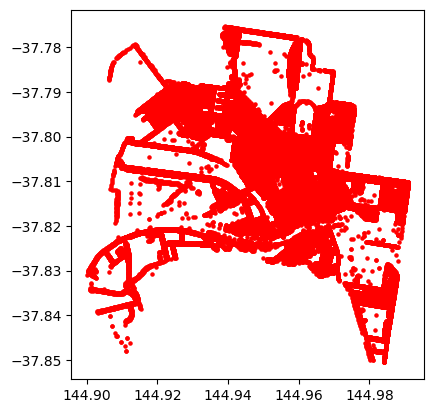

In [ ]:
gdf.plot(marker = 'o',color = 'red', markersize =5)

plt.show()

In [ ]:
import folium

m = folium.Map(location=[gdf['latitude'].mean(),
                        gdf['longitude'].mean()],zoom_start=12)

def add_point_to_map(row):
    folium.Marker(
    location = (row['latitude'],row['longitude']),
    popup=f"{row['str_name']},{row['suburb']}").add_to(m)

gdf.apply(add_point_to_map,axis=1)



0        None
1        None
2        None
3        None
4        None
         ... 
63716    None
63717    None
63718    None
63719    None
63720    None
Length: 63721, dtype: object